In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_test = pd.read_csv("../../data/ElectricDemandForecasting-DL-master_data_CECOVEL_test.csv")

In [3]:
df_test.head()

,value,timestamp
0,27.298,2016-03-01T00:00
1,176.818,2016-03-01T01:00
2,137.341,2016-03-01T02:00
3,116.532,2016-03-01T03:00
4,84.029,2016-03-01T04:00


In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2207 entries, 0 to 2206
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   value      2207 non-null   float64
 1   timestamp  2207 non-null   object 
dtypes: float64(1), object(1)
memory usage: 34.6+ KB


In [5]:
df_train = pd.read_csv("../../data/ElectricDemandForecasting-DL-master_data_CECOVEL_train.csv")

In [6]:
df_train.head()

,value,timestamp
0,1.000,2015-03-02T00:00
1,32.565,2015-03-02T01:00
2,38.347,2015-03-02T02:00
3,26.616,2015-03-02T03:00
4,17.202,2015-03-02T04:00


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   value      8759 non-null   float64
 1   timestamp  8759 non-null   object 
dtypes: float64(1), object(1)
memory usage: 137.0+ KB


In [8]:
full_df = df_train.append(df_test)

In [9]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10966 entries, 0 to 2206
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   value      10966 non-null  float64
 1   timestamp  10966 non-null  object 
dtypes: float64(1), object(1)
memory usage: 257.0+ KB


In [10]:
from datetime import datetime

In [11]:
string_timestamp = full_df.iloc[0]["timestamp"]

In [12]:
string_timestamp

'2015-03-02T00:00'

In [13]:
# testando função
datetime.strptime(string_timestamp, '%Y-%m-%dT%H:%M')

datetime.datetime(2015, 3, 2, 0, 0)

In [14]:
days = full_df["timestamp"].apply(lambda x : datetime.strptime(x,'%Y-%m-%dT%H:%M').day)

In [15]:
months = full_df["timestamp"].apply(lambda x : datetime.strptime(x,'%Y-%m-%dT%H:%M').month)

In [16]:
years = full_df["timestamp"].apply(lambda x : datetime.strptime(x,'%Y-%m-%dT%H:%M').year)

In [17]:
hours = full_df["timestamp"].apply(lambda x : datetime.strptime(x,'%Y-%m-%dT%H:%M').hour)

In [18]:
minutes = full_df["timestamp"].apply(lambda x : datetime.strptime(x,'%Y-%m-%dT%H:%M').minute)

In [19]:
dict_months = {1:"Jan",2:"Fev",3:"Mar", 4:"Abr", 5:"Maio",6:"Jun",7:"Jul", 8:"Ago", 9:"Set",10:"Out",11:"Nov",12:"Dez"}

In [20]:
def fromNumberToMonthName(number):
    return dict_months[number]

In [21]:
monthNames = months.apply(fromNumberToMonthName)

# Agora colocando isso tudo no dataframe inteiro (variável full_df)

In [22]:
full_df.head()

,value,timestamp
0,1.000,2015-03-02T00:00
1,32.565,2015-03-02T01:00
2,38.347,2015-03-02T02:00
3,26.616,2015-03-02T03:00
4,17.202,2015-03-02T04:00


In [23]:
full_df["Dia"] = days
full_df["Mês"] = monthNames
full_df["Ano"] = years
full_df["Hora"] = hours
full_df["Minuto"] = minutes

In [24]:
full_df["datetime"] = full_df["timestamp"].apply(lambda x : datetime.strptime(x,'%Y-%m-%dT%H:%M'))

In [25]:
full_df.head()

,value,timestamp,Dia,Mês,Ano,Hora,Minuto,datetime
0,1.000,2015-03-02T00:00,2,Mar,2015,0,0,2015-03-02 00:00:00
1,32.565,2015-03-02T01:00,2,Mar,2015,1,0,2015-03-02 01:00:00
2,38.347,2015-03-02T02:00,2,Mar,2015,2,0,2015-03-02 02:00:00
3,26.616,2015-03-02T03:00,2,Mar,2015,3,0,2015-03-02 03:00:00
4,17.202,2015-03-02T04:00,2,Mar,2015,4,0,2015-03-02 04:00:00


In [26]:
full_df.columns

Index(['value', 'timestamp', 'Dia', 'Mês', 'Ano', 'Hora', 'Minuto',
       'datetime'],
      dtype='object')

In [27]:
full_df.columns = ['Valor', 'timestamp', 'Dia', 'Mês', 'Ano', 'Hora', 'Minuto', 'datetime']

In [28]:
full_df.head()

,Valor,timestamp,Dia,Mês,Ano,Hora,Minuto,datetime
0,1.000,2015-03-02T00:00,2,Mar,2015,0,0,2015-03-02 00:00:00
1,32.565,2015-03-02T01:00,2,Mar,2015,1,0,2015-03-02 01:00:00
2,38.347,2015-03-02T02:00,2,Mar,2015,2,0,2015-03-02 02:00:00
3,26.616,2015-03-02T03:00,2,Mar,2015,3,0,2015-03-02 03:00:00
4,17.202,2015-03-02T04:00,2,Mar,2015,4,0,2015-03-02 04:00:00


In [29]:
full_df.describe()

,Valor,Dia,Ano,Hora,Minuto
count,10966.000000,10966.000000,10966.000000,10966.000000,10966.0
mean,33.627420,15.803028,2015.332573,11.501733,0.0
std,74.574178,8.802336,0.471157,6.921944,0.0
min,0.000000,1.000000,2015.000000,0.000000,0.0
25%,8.973000,8.000000,2015.000000,6.000000,0.0
50%,16.691000,16.000000,2015.000000,12.000000,0.0
75%,30.449250,23.000000,2016.000000,17.750000,0.0
max,989.000000,31.000000,2016.000000,23.000000,0.0


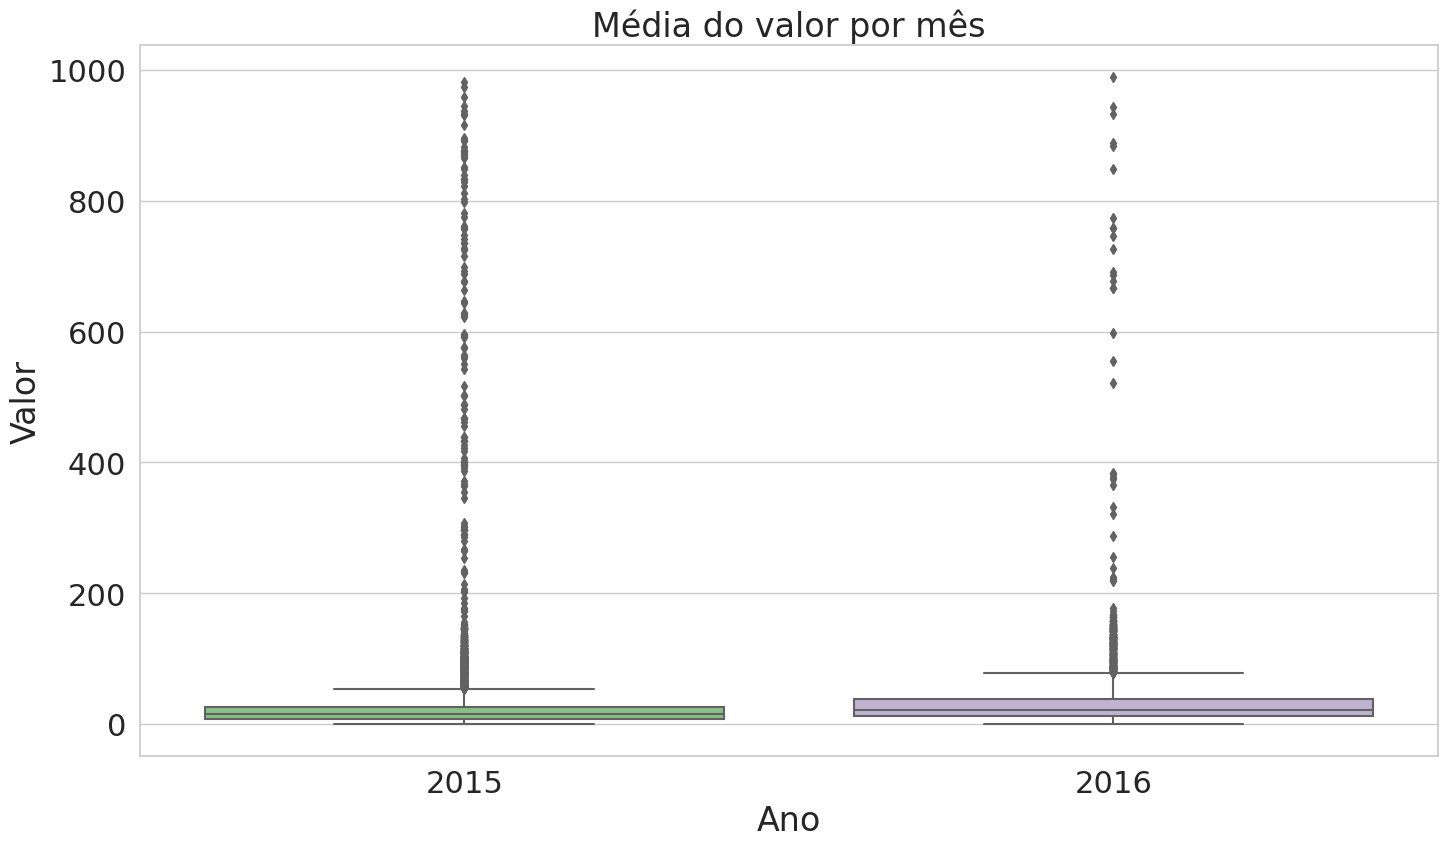

In [30]:
plt.figure(figsize=(15,9), dpi=100)

sns.set_style('whitegrid')
sns.set_context('notebook', font_scale = 2)

plt.title('Média do valor por mês')

sns.boxplot(x='Ano', y='Valor', data = full_df, palette='Accent')

plt.tight_layout()

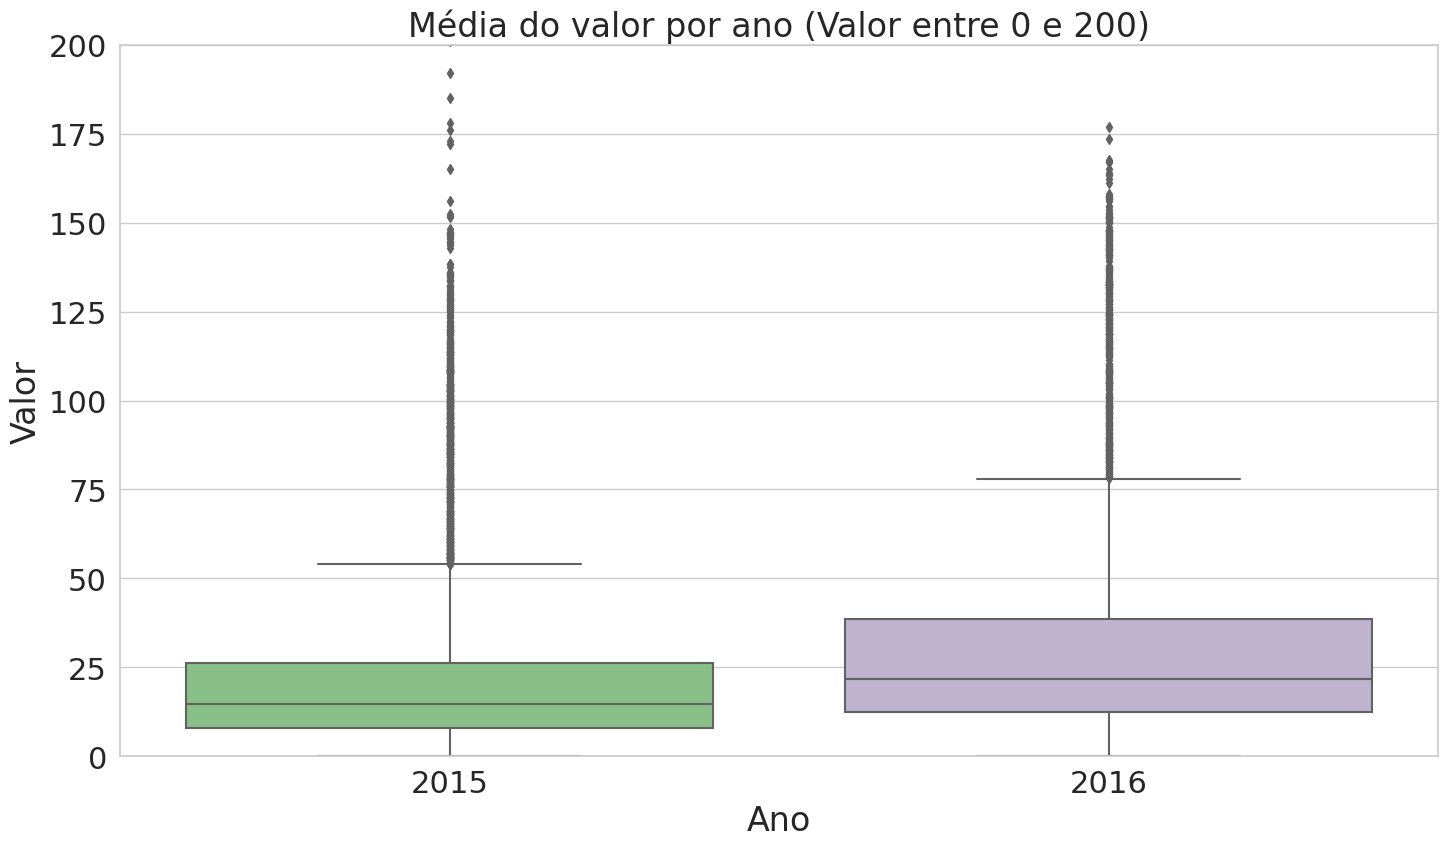

In [31]:
plt.figure(figsize=(15,9), dpi=100)

plt.title('Média do valor por ano (Valor entre 0 e 200)')

sns.boxplot(x='Ano', y='Valor', data = full_df, palette='Accent')

plt.ylim([0,200])

plt.tight_layout()

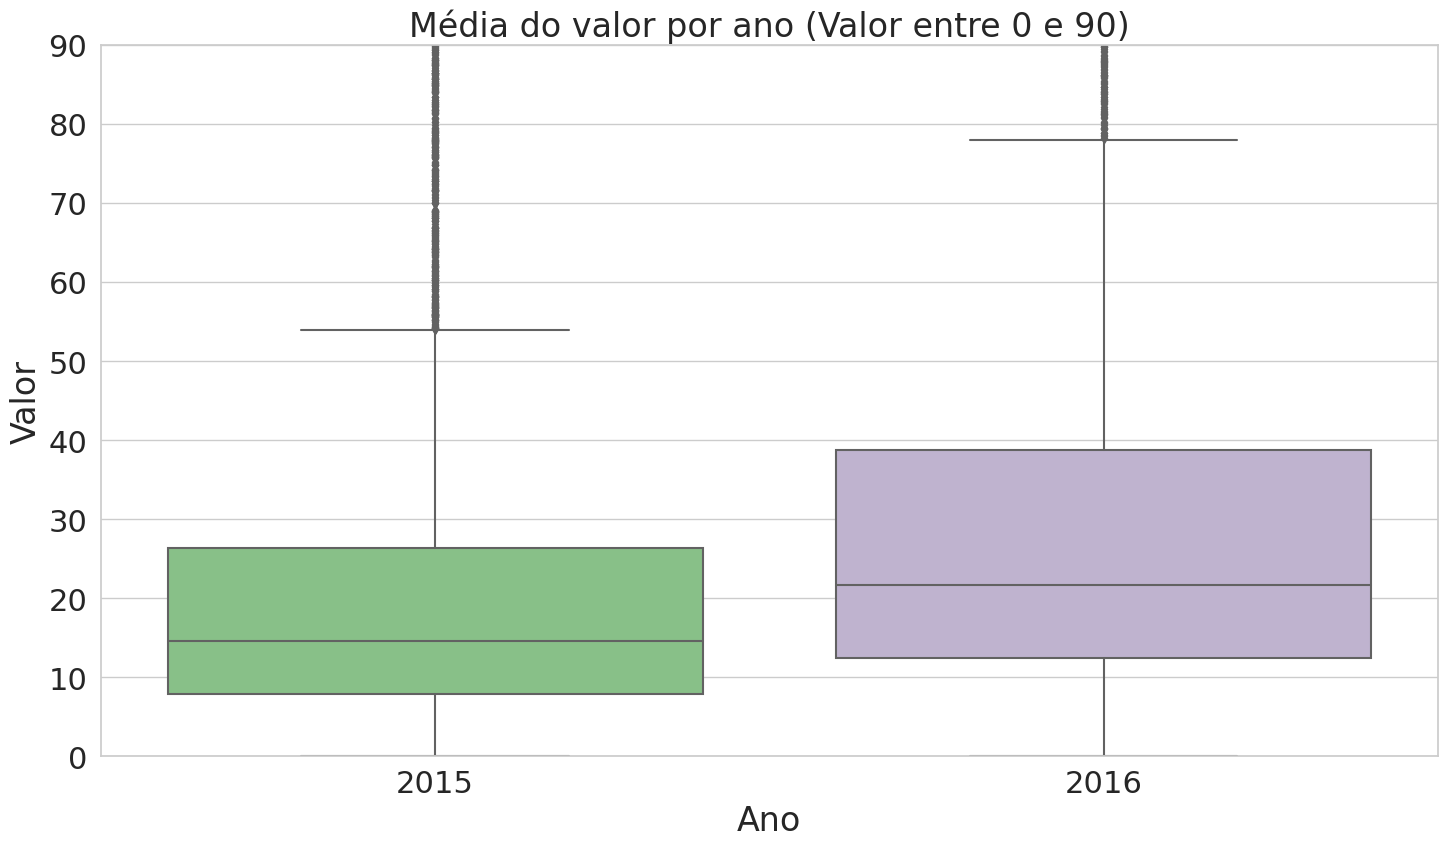

In [32]:
plt.figure(figsize=(15,9), dpi=100)

plt.title('Média do valor por ano (Valor entre 0 e 90)')

sns.boxplot(x='Ano', y='Valor', data = full_df, palette='Accent')

plt.ylim([0,90])

plt.tight_layout()

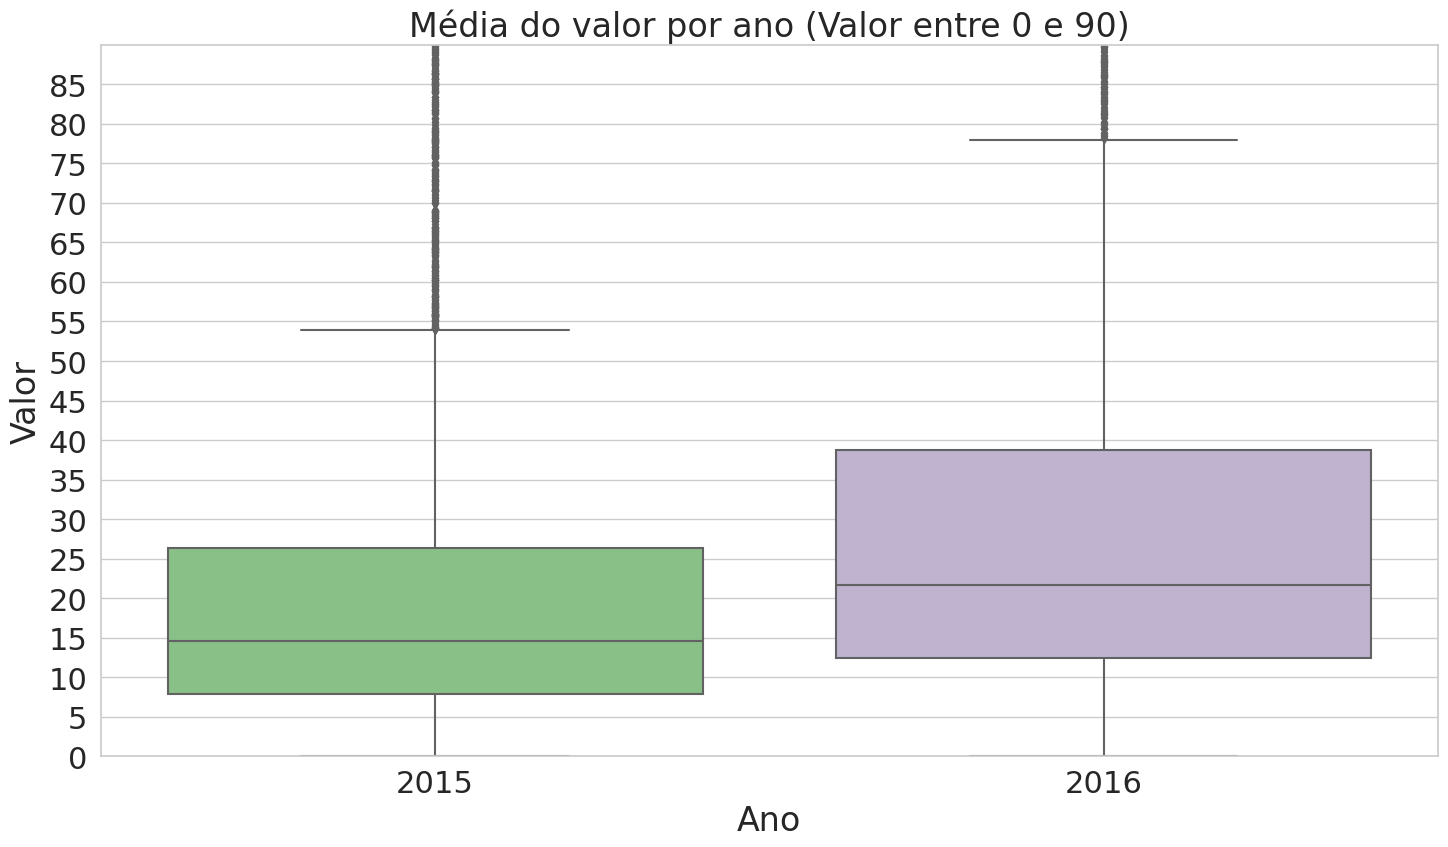

In [33]:
plt.figure(figsize=(15,9), dpi=100)

plt.title('Média do valor por ano (Valor entre 0 e 90)')

sns.boxplot(x='Ano', y='Valor', data = full_df, palette='Accent')

plt.ylim([0,90])

plt.yticks(np.arange(0,90,5))

plt.tight_layout()

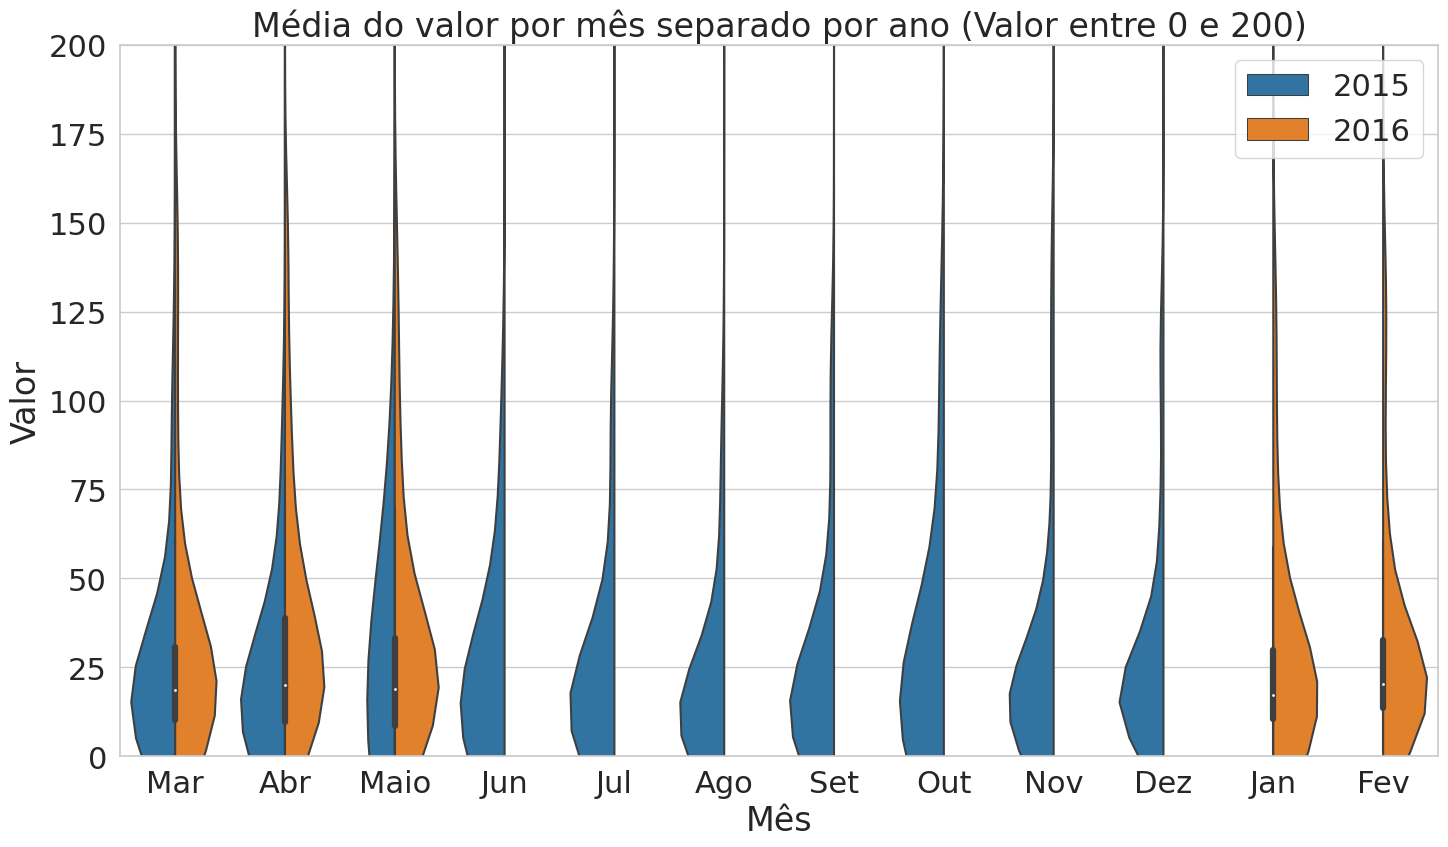

In [34]:
plt.figure(figsize=(15,9), dpi=100)

plt.title('Média do valor por mês separado por ano (Valor entre 0 e 200)')

sns.violinplot(x = 'Mês', y = 'Valor', data = full_df, hue='Ano', split = True)

plt.ylim([0,200])

plt.legend(loc=0)

#plt.yticks(np.arange(0,90,5))

plt.tight_layout()

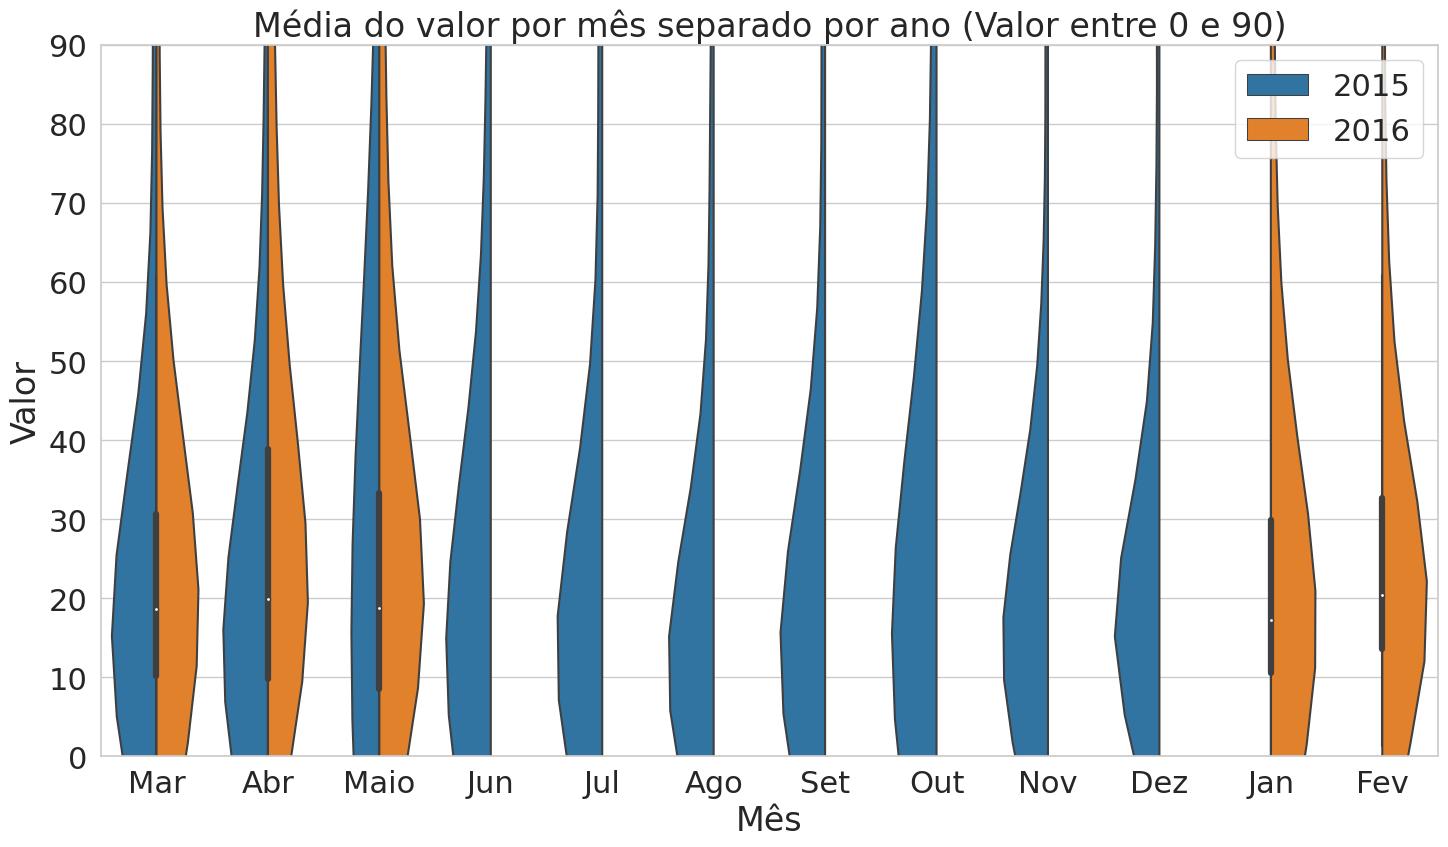

In [35]:
plt.figure(figsize=(15,9), dpi=100)

plt.title('Média do valor por mês separado por ano (Valor entre 0 e 90)')

sns.violinplot(x = 'Mês', y = 'Valor', data = full_df, hue='Ano', split = True)

plt.ylim([0,90])

#plt.yticks(np.arange(0,90,5))

plt.legend(loc=0)

plt.tight_layout()

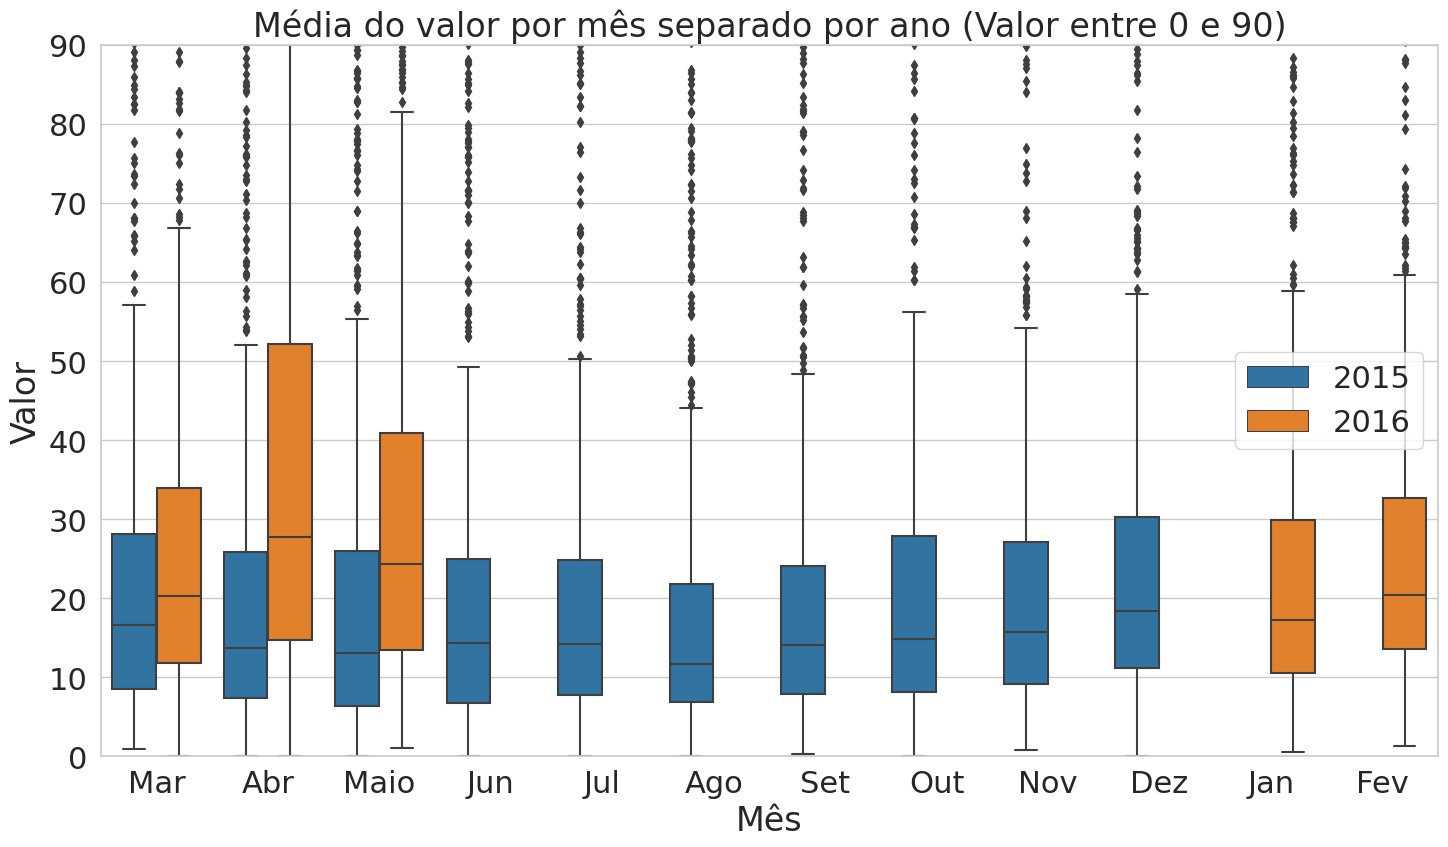

In [36]:
plt.figure(figsize=(15,9), dpi=100)

plt.title('Média do valor por mês separado por ano (Valor entre 0 e 90)')

sns.boxplot(x = 'Mês', y = 'Valor', data = full_df, hue='Ano')

plt.ylim([0,90])

#plt.yticks(np.arange(0,90,5))

plt.legend(loc=0)

plt.tight_layout()

In [38]:
#A pivot table usando média aritmética como group by
pivot_full_df = full_df.pivot_table(index='Mês',columns='Dia', values='Valor')

In [40]:
pivot_full_df

Dia,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
Mês,,,,,,,,,,,,,,,,,,,,,
Abr,47.026792,29.249000,38.177187,27.356542,49.664208,33.655437,34.759146,35.679354,28.361917,31.873417,...,34.080521,37.397021,22.320313,46.157375,43.526521,31.904917,35.202250,31.272792,42.272271,NaN
Ago,53.970083,43.076917,16.947250,22.717708,26.449542,24.790583,20.766667,31.692000,16.561042,28.841208,...,33.482792,10.808083,12.291750,24.631125,22.952917,26.318833,25.090792,18.944958,32.788458,14.879167
Dez,33.510083,37.098292,30.069875,36.834667,29.397833,21.923833,15.167875,22.673000,19.866583,34.499333,...,41.791500,31.300292,66.663000,20.092292,18.659125,32.730417,16.361708,29.216583,38.435250,29.305792
Fev,23.883667,36.623167,33.877667,38.272667,31.533083,30.250333,20.539083,22.517958,34.990833,38.731417,...,21.590750,37.033958,35.958583,35.057625,34.003583,46.135208,60.232000,30.074458,NaN,NaN
Jan,55.680375,12.187542,24.058333,19.799875,62.843083,62.088208,19.555333,29.280417,48.274792,15.106875,...,31.791625,39.926625,50.270375,23.000167,29.859875,29.147167,30.564167,34.208792,54.792250,41.063250
Jul,23.506000,26.326167,31.072583,18.859583,35.111125,51.020917,28.889667,26.068875,31.516917,27.893625,...,22.602125,24.460625,27.517917,29.735708,8.342333,19.199292,23.115167,23.122417,27.925042,19.763583
Jun,36.515417,24.828542,22.202000,22.930083,36.360500,13.672667,47.503333,46.486667,25.888208,21.485833,...,43.120875,30.256667,24.682292,27.569333,22.733208,40.582792,23.162792,14.963292,26.744333,NaN
Maio,46.098062,40.472479,52.825937,34.652500,32.272708,31.188771,41.029521,42.639250,42.696958,93.273292,...,22.280042,39.747188,42.683979,56.822396,44.305875,30.604333,24.700396,42.211104,100.855479,44.931937
Mar,39.627458,26.220646,33.561833,31.128937,28.294750,19.070750,31.098625,40.897437,30.137750,34.708604,...,23.463146,38.344354,59.650917,34.584708,34.032667,18.999170,21.306729,57.505170,37.895437,33.210896


In [55]:
full_df = full_df.sort_values(by='datetime')

In [59]:
df2015 = full_df[ full_df['Ano'] == 2015]

In [78]:
plt.figure(figsize=(20,9), dpi=100)


<Figure size 2000x900 with 0 Axes>

<Figure size 2000x900 with 0 Axes>